In [2]:
import pandas as pd
import numpy as np

### Values considered “missing”

In [3]:
# trabalharemos com este dataset
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])

In [4]:
df['four'] = 'bar'
df['five'] = df['one'] > 0

In [20]:
df1 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df1

,one,two,three,four,five
a,-0.673873,0.547642,-1.348142,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,-0.119678,-0.515520,-1.176318,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,0.246110,-0.223863,0.821108,bar,True
f,0.857027,0.740801,-0.640583,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-0.627072,-0.753209,-1.578310,bar,False


Podemos usar as funções isna() e notna() para detectar valores nulos em Series e DataFrames

In [36]:
pd.isna(df1['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [39]:
df1['two'].isna()

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: two, dtype: bool

In [40]:
df1.notna()

,one,two,three,four,five
a,True,True,True,True,True
b,False,False,False,False,False
c,True,True,True,True,True
d,False,False,False,False,False
e,True,True,True,True,True
f,True,True,True,True,True
g,False,False,False,False,False
h,True,True,True,True,True


In [41]:
df1['three'].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: three, dtype: bool

In [43]:
pd.notna(df1['one'])

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

##### Importante

    Valores Nan nao sao comparaveis entre si
    Portanto:
    np.nan != np.nan
    
    - - - - - - - - -
    
    Sendo assim, eh errado procurar valores nulos com a seguinte expressao:
    df1['one'] == np.nan
    
    Vai dar erro, pois Nan eh sempre diferente de Nan

In [52]:
df1['one'] == np.nan

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
Name: one, dtype: bool

##### Integer dtypes and missing data
    np.nan eh um valor float
    
    Se colocarmos uma coluna de integers com apenas um np.nan, a coluna inteira acaba virando float

In [59]:
pd.Series([1, 2, np.nan, 4])

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

    Para evitar isso podemos explicitar o tipo de dado como inteiro ('Int64')

In [61]:
pd.Series([1, 2, 3, np.nan], dtype='Int64')

0      1
1      2
2      3
3    NaN
dtype: Int64

### Datetimes

    Para o formato datetime, Nat (not a time) eh o equivalente a Nan para valores nulos

In [71]:
df['datetime'] = pd.Timestamp('2020-04-20')
df

,one,two,three,four,five,datetime
a,-0.673873,0.547642,-1.348142,bar,False,2020-04-20
c,-0.119678,-0.515520,-1.176318,bar,False,2020-04-20
e,0.246110,-0.223863,0.821108,bar,True,2020-04-20
f,0.857027,0.740801,-0.640583,bar,True,2020-04-20
h,-0.627072,-0.753209,-1.578310,bar,False,2020-04-20


In [72]:
df.loc[['a', 'c', 'h'], ['one', 'four', 'datetime']] = np.nan

In [73]:
df

,one,two,three,four,five,datetime
a,NaN,0.547642,-1.348142,NaN,False,NaT
c,NaN,-0.515520,-1.176318,NaN,False,NaT
e,0.246110,-0.223863,0.821108,bar,True,2020-04-20
f,0.857027,0.740801,-0.640583,bar,True,2020-04-20
h,NaN,-0.753209,-1.578310,NaN,False,NaT


In [76]:
df.dtypes.value_counts()

float64           3
object            1
bool              1
datetime64[ns]    1
dtype: int64

### Inserting Missing Data

     Valores numericos sempre usarao NaN para representar valor nulo

In [77]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [82]:
s.loc[0] = None # usando None ou np.nan sempre NaN representara valor nulo

In [83]:
s

0    NaN
1    2.0
2    3.0
dtype: float64

    Ja objetos sempre vao considerar o valor dado como nulo

In [92]:
s1 = pd.Series(['a', 'b', 'c'])
s1[0] = np.nan
s1

0    NaN
1      b
2      c
dtype: object

In [91]:
s1.loc[1] = None
s1

0     NaN
1    None
2       c
dtype: object

### Calculations with missing data

    - Para somar, NaN sera equivalente ao valor 0
    
    - Se todos os dados sao NaN, o resultado sera 0
    
    - Operacoes cumulativas (cumsum e cumprod) ignoram os valores NaN, mas estes influenciam no tamanho do array
        - Para incluir valores NaN na operacao mude o parametro "skipna" para False

In [152]:
# Para ilustrar, criaremos 2 DFs para fazer as operacoes:

# tabela x

x = pd.DataFrame(np.random.randn(5,2), columns=['one', 'two'], index=['a', 'c', 'e', 'f', 'h'])
x.loc[['a', 'c'], ['one']] = np.nan

# tabela y

y = x.copy()
y['three'] = np.random.randn(5)

In [153]:
x

,one,two
a,NaN,-0.310632
c,NaN,-0.238749
e,-0.187862,-1.072061
f,0.788346,-0.516069
h,-0.693138,-0.702008


In [154]:
y

,one,two,three
a,NaN,-0.310632,0.858112
c,NaN,-0.238749,0.340567
e,-0.187862,-1.072061,-0.890353
f,0.788346,-0.516069,0.121998
h,-0.693138,-0.702008,-2.214437


In [155]:
x + y

,one,three,two
a,NaN,NaN,-0.621265
c,NaN,NaN,-0.477498
e,-0.375725,NaN,-2.144122
f,1.576692,NaN,-1.032138
h,-1.386277,NaN,-1.404017


In [161]:
y['one'].sum()

-0.0926544913121724

In [162]:
y.mean(1)

a    0.273740
c    0.050909
e   -0.716759
f    0.131425
h   -1.203195
dtype: float64

In [163]:
y.cumsum()

,one,two,three
a,NaN,-0.310632,0.858112
c,NaN,-0.549381,1.198679
e,-0.187862,-1.621442,0.308326
f,0.600484,-2.137511,0.430324
h,-0.092654,-2.839520,-1.784113


In [164]:
y.cumsum(skipna=False)

,one,two,three
a,NaN,-0.310632,0.858112
c,NaN,-0.549381,1.198679
e,NaN,-1.621442,0.308326
f,NaN,-2.137511,0.430324
h,NaN,-2.839520,-1.784113


### Sum/prod of empties/nans

    A soma de uma serie ou coluna com todos valores NaN sera sempre 0
    
    O produto de uma serie ou coluna com todos valores NaN sera sempre 1

In [167]:
s = pd.Series([np.nan, np.nan])

In [169]:
s.sum()

0.0

In [170]:
s.prod()

1.0

### NA values in groupby

    Valores NA sao excluidos em operacoes de GroupBy

In [171]:
df

,one,two,three,four,five,datetime
a,NaN,0.547642,-1.348142,NaN,False,NaT
c,NaN,-0.515520,-1.176318,NaN,False,NaT
e,0.246110,-0.223863,0.821108,bar,True,2020-04-20
f,0.857027,0.740801,-0.640583,bar,True,2020-04-20
h,NaN,-0.753209,-1.578310,NaN,False,NaT


In [173]:
df.groupby('one').sum()

,two,three,five
one,,,
0.246110,-0.223863,0.821108,True
0.857027,0.740801,-0.640583,True


### Filling missing values: Fillna

    o metodo fillna() preenche os valores nulos com valores nao-nulos

In [177]:
df3 = df.copy()
df3

,one,two,three,four,five,datetime
a,NaN,0.547642,-1.348142,NaN,False,NaT
c,NaN,-0.515520,-1.176318,NaN,False,NaT
e,0.246110,-0.223863,0.821108,bar,True,2020-04-20
f,0.857027,0.740801,-0.640583,bar,True,2020-04-20
h,NaN,-0.753209,-1.578310,NaN,False,NaT


In [178]:
df3.fillna(0)

,one,two,three,four,five,datetime
a,0.000000,0.547642,-1.348142,0,False,0
c,0.000000,-0.515520,-1.176318,0,False,0
e,0.246110,-0.223863,0.821108,bar,True,2020-04-20 00:00:00
f,0.857027,0.740801,-0.640583,bar,True,2020-04-20 00:00:00
h,0.000000,-0.753209,-1.578310,0,False,0


In [180]:
df3['one'].fillna('missing')

a     missing
c     missing
e     0.24611
f    0.857027
h     missing
Name: one, dtype: object

##### Fill gaps forward or backward

    Tambem podemos usar os argumentos abaixo para nos ajudar a preencher missing values:
    
    pad/ffill = preenche os valores posteriores
    
    bfill/backfill = preenche os valores anteriores
    
    Podemos estabelecer um limite para esse preenchimento com o metodo "limit"   

In [190]:
# todos valores NA imediatamente posteriores a um dado valido serao preenchidos com o mesmo valor deste dado
# a linha 'h', antes nula, foi preenchida com o mesmo valor da linha 'f'

df3.fillna(method='pad')

,one,two,three,four,five,datetime
a,NaN,0.547642,-1.348142,NaN,False,NaT
c,NaN,-0.515520,-1.176318,NaN,False,NaT
e,0.246110,-0.223863,0.821108,bar,True,2020-04-20
f,0.857027,0.740801,-0.640583,bar,True,2020-04-20
h,0.857027,-0.753209,-1.578310,bar,False,2020-04-20


In [191]:
# todos valores NA imediatamente anteriores a um dado valido receberao o mesmo valor deste dado
# as linhas 'a' e 'c', antes nulas, recebem o mesmo valor da linha 'e'
# neste criterio a linha 'h' permanece nula porque ela nao esta antes de nenhuma linha valida

df3.fillna(method='bfill')

,one,two,three,four,five,datetime
a,0.246110,0.547642,-1.348142,bar,False,2020-04-20
c,0.246110,-0.515520,-1.176318,bar,False,2020-04-20
e,0.246110,-0.223863,0.821108,bar,True,2020-04-20
f,0.857027,0.740801,-0.640583,bar,True,2020-04-20
h,NaN,-0.753209,-1.578310,NaN,False,NaT


In [192]:
df3

,one,two,three,four,five,datetime
a,NaN,0.547642,-1.348142,NaN,False,NaT
c,NaN,-0.515520,-1.176318,NaN,False,NaT
e,0.246110,-0.223863,0.821108,bar,True,2020-04-20
f,0.857027,0.740801,-0.640583,bar,True,2020-04-20
h,NaN,-0.753209,-1.578310,NaN,False,NaT


Podemos limitar ate quantos pontos esse preenchimento automatico alcança com o método "limit"

In [207]:
df4 = df3.copy()
df4.iloc[[1, 3, 4], 2] = np.nan
df4

,one,two,three,four,five,datetime
a,NaN,0.547642,-1.348142,NaN,False,NaT
c,NaN,-0.515520,NaN,NaN,False,NaT
e,0.246110,-0.223863,0.821108,bar,True,2020-04-20
f,0.857027,0.740801,NaN,bar,True,2020-04-20
h,NaN,-0.753209,NaN,NaN,False,NaT


In [208]:
df4['three'].fillna(method='pad', limit=1)

a   -1.348142
c   -1.348142
e    0.821108
f    0.821108
h         NaN
Name: three, dtype: float64

In [209]:
df4['three'].fillna(method='bfill', limit=1)

a   -1.348142
c    0.821108
e    0.821108
f         NaN
h         NaN
Name: three, dtype: float64

### Filling with a Pandas object

In [210]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list('ABC'))

In [214]:
dff.iloc[2:4, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[6:9, 2] = np.nan
dff

,A,B,C
0,-1.279895,-0.648746,0.380699
1,0.301639,0.800640,0.107994
2,NaN,-1.916166,0.685241
3,NaN,0.094380,-0.269841
4,0.017727,NaN,-0.366757
5,-0.543881,NaN,-0.530497
6,1.827497,0.308367,NaN
7,0.674216,2.080025,NaN
8,0.841994,-0.220707,NaN
9,-0.116248,0.815007,1.723518


In [228]:
# os valores NA de cada coluna eh preenchido com a media de suas respectivas colunas
dff.fillna(dff.mean())

,A,B,C
0,-1.279895,-0.648746,0.380699
1,0.301639,0.800640,0.107994
2,0.215381,-1.916166,0.685241
3,0.215381,0.094380,-0.269841
4,0.017727,0.164100,-0.366757
5,-0.543881,0.164100,-0.530497
6,1.827497,0.308367,0.247194
7,0.674216,2.080025,0.247194
8,0.841994,-0.220707,0.247194
9,-0.116248,0.815007,1.723518


In [238]:
# aqui so os valores NA de B e C serao preenchidos
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,-1.279895,-0.648746,0.380699
1,0.301639,0.800640,0.107994
2,NaN,-1.916166,0.685241
3,NaN,0.094380,-0.269841
4,0.017727,0.164100,-0.366757
5,-0.543881,0.164100,-0.530497
6,1.827497,0.308367,0.247194
7,0.674216,2.080025,0.247194
8,0.841994,-0.220707,0.247194
9,-0.116248,0.815007,1.723518


### Dropping axis labels with missing data: dropna

    Para excluir algunha linha ou coluna que possua valores NA usamos o metodo dropna()

In [246]:
# vamos trazer uma nova versao de dff onde somente a coluna A traz valores NA

df5 = dff.fillna(dff.mean()['B':'C'])
df5

,A,B,C
0,-1.279895,-0.648746,0.380699
1,0.301639,0.800640,0.107994
2,NaN,-1.916166,0.685241
3,NaN,0.094380,-0.269841
4,0.017727,0.164100,-0.366757
5,-0.543881,0.164100,-0.530497
6,1.827497,0.308367,0.247194
7,0.674216,2.080025,0.247194
8,0.841994,-0.220707,0.247194
9,-0.116248,0.815007,1.723518


In [248]:
df5.dropna() # por default, esta função atua no axis = 0

,A,B,C
0,-1.279895,-0.648746,0.380699
1,0.301639,0.800640,0.107994
4,0.017727,0.164100,-0.366757
5,-0.543881,0.164100,-0.530497
6,1.827497,0.308367,0.247194
7,0.674216,2.080025,0.247194
8,0.841994,-0.220707,0.247194
9,-0.116248,0.815007,1.723518


In [249]:
df5.dropna(axis=1) # para referenciarmos as colunas basta alterar o valor de axis para 1

,B,C
0,-0.648746,0.380699
1,0.800640,0.107994
2,-1.916166,0.685241
3,0.094380,-0.269841
4,0.164100,-0.366757
5,0.164100,-0.530497
6,0.308367,0.247194
7,2.080025,0.247194
8,-0.220707,0.247194
9,0.815007,1.723518


O metodo 'how' usa os seguintes argumentos para determinar como vamos selecionar os valores NA para dropar

    'all' significa que so vai dropar valores NA se todos os valores daquele eixo tambem forem NaN
    
    'any' (valor default) significa que vai dropar valores NA se qualquer um dos valores daquele eixo for NaN

In [258]:
df5.dropna(how='all', axis=0)

,A,B,C
0,-1.279895,-0.648746,0.380699
1,0.301639,0.800640,0.107994
2,NaN,-1.916166,0.685241
3,NaN,0.094380,-0.269841
4,0.017727,0.164100,-0.366757
5,-0.543881,0.164100,-0.530497
6,1.827497,0.308367,0.247194
7,0.674216,2.080025,0.247194
8,0.841994,-0.220707,0.247194
9,-0.116248,0.815007,1.723518


In [256]:
df5.dropna(how='any', axis=0)

,A,B,C
0,-1.279895,-0.648746,0.380699
1,0.301639,0.800640,0.107994
4,0.017727,0.164100,-0.366757
5,-0.543881,0.164100,-0.530497
6,1.827497,0.308367,0.247194
7,0.674216,2.080025,0.247194
8,0.841994,-0.220707,0.247194
9,-0.116248,0.815007,1.723518


O método 'subset' seleciona quais colunas ou indices do eixo oposto a chamada de dropna() vai se aplicar:

In [296]:
# neste caso aqui, colocamos axis como 0 e definimos que vamos procurar valores NA em todas as linhas da coluna B

df5.dropna(subset=['B'], axis=0)

,A,B,C
0,-1.279895,-0.648746,0.380699
1,0.301639,0.800640,0.107994
2,NaN,-1.916166,0.685241
3,NaN,0.094380,-0.269841
4,0.017727,0.164100,-0.366757
5,-0.543881,0.164100,-0.530497
6,1.827497,0.308367,0.247194
7,0.674216,2.080025,0.247194
8,0.841994,-0.220707,0.247194
9,-0.116248,0.815007,1.723518


In [298]:
# aqui vamos procurar valores NaN em todas as colunas dos indices (rows) 3 e 8
# como o valor default de 'how' eh 'any', um unico valor achado de NaN ja exclui toda a coluna

df5.dropna(subset=[3, 8], axis=1)

,B,C
0,-0.648746,0.380699
1,0.800640,0.107994
2,-1.916166,0.685241
3,0.094380,-0.269841
4,0.164100,-0.366757
5,0.164100,-0.530497
6,0.308367,0.247194
7,2.080025,0.247194
8,-0.220707,0.247194
9,0.815007,1.723518


Para mais detalhes e parâmetros de dropna favor seguir link abaixo:

[Link para as funcoes de dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna)

### Interpolation

    Por padrão, a função interpolate() realiza a interpolação linear para preencher valores NA

In [315]:
ts = pd.Series(np.random.randn(100), index=pd.date_range('2020-04-22', periods=100, freq='D'))
ts.iloc[2:8] = np.nan
ts.iloc[31:43] = np.nan
ts.iloc[79:86] = np.nan

In [317]:
# temos o total de 75 valores validos
ts.count()

75

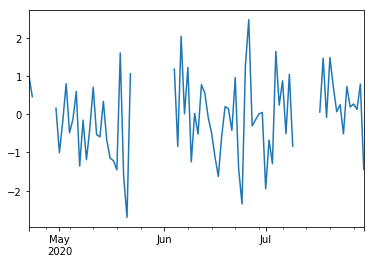

In [318]:
# ao plotarmos esta serie, vemos o gap resultante dos valores NA
ts.plot()

In [319]:
# para fazer a interpolação linear basta fazermos uma chamada simples da função
ts.interpolate()

2020-04-22    0.993254
2020-04-23    0.454905
2020-04-24    0.411910
2020-04-25    0.368915
2020-04-26    0.325919
2020-04-27    0.282924
2020-04-28    0.239928
2020-04-29    0.196933
2020-04-30    0.153938
2020-05-01   -1.011322
2020-05-02   -0.180990
2020-05-03    0.796265
2020-05-04   -0.488805
2020-05-05   -0.135209
2020-05-06    0.591667
2020-05-07   -1.357397
2020-05-08   -0.156037
2020-05-09   -1.189932
2020-05-10   -0.373972
2020-05-11    0.704505
2020-05-12   -0.535045
2020-05-13   -0.594322
2020-05-14    0.334899
2020-05-15   -0.676476
2020-05-16   -1.150663
2020-05-17   -1.217165
2020-05-18   -1.456484
2020-05-19    1.599637
2020-05-20   -1.618372
2020-05-21   -2.698040
                ...   
2020-07-01   -1.953420
2020-07-02   -0.678858
2020-07-03   -1.296406
2020-07-04    1.637985
2020-07-05    0.236119
2020-07-06    0.872513
2020-07-07   -0.512454
2020-07-08    1.040248
2020-07-09   -0.837011
2020-07-10   -0.725546
2020-07-11   -0.614081
2020-07-12   -0.502616
2020-07-13 

In [321]:
# agora quando interpolamos vemos que todos os valores NA foram preenchidos
ts.interpolate().count()

100

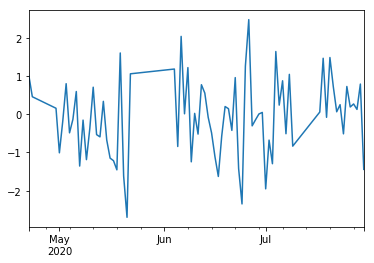

In [323]:
# demonstração gráfica dos novos dados preenchidos
ts.interpolate().plot()

Os exemplos acima consideram uma interpolação linear, onde o intervalo entre os pontos conhecidos são proporcionais

Mas, e no caso de uma distância não proporcional? No caso de indice de datas distantes por exemplo?

O tipo de interpolação apropriado vai depender do tipo de dados que está sendo trabalhado

Neste caso, o argumento "method" pode nos ajudar
    - Ele nos dá acesso a tipos de interpolação mais avançados

In [16]:
# aqui vamos trabalhar considerando o indice como pontos no eixo do intervalo
se = pd.Series([1, 10, 20, 30, 40], index=[pd.Timestamp('2020-01-31'), pd.Timestamp('2020-02-29'), 
                                pd.Timestamp('2022-07-31'), pd.Timestamp('2023-03-31'),pd.Timestamp('2026-06-20') ])

se.iloc[[1, 3]] = np.nan

In [17]:
se

2020-01-31     1.0
2020-02-29     NaN
2022-07-31    20.0
2023-03-31     NaN
2026-06-20    40.0
dtype: float64

In [20]:
# aqui podemos ver que por padrao a função interpolate faz interpolação linear
se.interpolate()

2020-01-31     1.0
2020-02-29    10.5
2022-07-31    20.0
2023-03-31    30.0
2026-06-20    40.0
dtype: float64

In [21]:
# ja se passarmos "time" para o argumento "method", a interpolação sera feita respeitando o intervalo de tempo
se.interpolate(method='time')

2020-01-31     1.000000
2020-02-29     1.604167
2022-07-31    20.000000
2023-03-31    23.422535
2026-06-20    40.000000
dtype: float64

In [22]:
# para indice de floating points o argumento de "method" sera "values"
ser = pd.Series([1.0, np.nan, 10], index=[0.0, 1.0, 10.0])
ser

0.0      1.0
1.0      NaN
10.0    10.0
dtype: float64

In [25]:
ser.interpolate()

0.0      1.0
1.0      5.5
10.0    10.0
dtype: float64

In [26]:
ser.interpolate(method='values')

0.0      1.0
1.0      1.9
10.0    10.0
dtype: float64

In [27]:
# alem de series, claro que podemos fazer interpolação de dataframes também
df = pd.DataFrame({'A':[1, 2.1, np.nan, 4.7, 5.6, 6.8], 'B':[.25, np.nan, np.nan, 4, 12.2, 14.4]})
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [28]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


Para ter acesso a metodos mais avancados de interpolacao eh necessario ter o scipy instalado

Acesse [aqui](https://pandas.pydata.org/docs/user_guide/missing_data.html#string-regular-expression-replacement) para mais detalhes

##### Interpolation limits

    - O argumento "limit" nos possibilita estabelecer um limite para preenchimento consecutivo

In [31]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13, np.nan, np.nan])
ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [33]:
# por padrao, preenchemos valores consecutivos e no sentido progressivo (de cima para baixo)
# nesse caso, perceba que o valores antes do primeiro valor valido nao sao preenchidos
ser.interpolate()

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

In [35]:
# ja para preencher apenas 1 valor NA apos o primeiro valor valido basta usarmos o argumento "limit"
# a direcao de preenchimento continua a padrao (cima para baixo)
ser.interpolate(limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5     NaN
6    13.0
7    13.0
8     NaN
dtype: float64

Para mudarmos a direção de preenchimento podemos usar o argumento "limit_direction"

In [38]:
# aqui preenchemos 1 valor NA no sentido regressivo (de baixo para cima)
ser.interpolate(limit_direction='backward', limit=1)

0     NaN
1     5.0
2     5.0
3     NaN
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [40]:
# aqui preenchemos 1 valor NA em ambas direções (progressivo e regressivo)
ser.interpolate(limit_direction='both', limit=1)

0     NaN
1     5.0
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7    13.0
8     NaN
dtype: float64

In [42]:
# aqui preenchemos todos valores NA em ambas direções
ser.interpolate(limit_direction='both')

0     5.0
1     5.0
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

In [43]:
# Usamos o argumento "limit_area" para restringir quais valores NA devem ser preenchidos

# - outside --> valores NA que nao estao entre valores validos
# - inside  --> valores NA que estao entre valores validos

In [48]:
# neste caso aqui somente os valores que estao entre 5 e 13 serao preenchidos
ser.interpolate(limit_direction='both', limit_area='inside', limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [49]:
# aqui somente so serao preenchidos os valores NA que nao estao entre valores validos
# nao foram preenchidos valores antes do 5.0 pq nao especificamos a direcao (limit_direction)
ser.interpolate(limit_area='outside')

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7    13.0
8    13.0
dtype: float64

In [51]:
# ja aqui todos os valores NA que nao estao entre validos sao preenchidos em ambas direções
ser.interpolate(limit_direction='both', limit_area='outside')

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7    13.0
8    13.0
dtype: float64

In [54]:
# aqui preenchemos valores NA que estão outside e em direção regressiva
ser.interpolate(limit_area='outside', limit_direction='backward')

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

### Replacing generic values

    - Podemos substituir valores usando o método .replace()

In [58]:
ser = pd.Series([1, 2, 3, 4, 5])
ser

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [59]:
# aqui vamos substituir o 2 por 1000
ser.replace(2, 1000)

0       1
1    1000
2       3
3       4
4       5
dtype: int64

In [62]:
# tambem podemos usar uma lista para substituir mais de um valor
ser.replace([2, 3, 5], [2000, 3000, 5000])

0       1
1    2000
2    3000
3       4
4    5000
dtype: int64

In [63]:
ser.replace([2, 3, 5], 1000)

0       1
1    1000
2    1000
3       4
4    1000
dtype: int64

In [66]:
# podemos tambem especificar um mapa para especificar cada valor individual
# aqui substituimos 1 por x, 2 por 1000 e 3 por tres
ser.replace({1:'x', 2:1000, 3:'tres'})

0       x
1    1000
2    tres
3       4
4       5
dtype: object

In [75]:
# em dataframes, podemos usar o dicionario para especificar valores individuais por coluna 
df = pd.DataFrame({'a':[0, 1, 2, 3, 4, 5], 'b':[6, 7, 8, 9, 10, 11]})

In [76]:
df.replace({'a':0, 'b':6}, 1000)

,a,b
0,1000,1000
1,1,7
2,2,8
3,3,9
4,4,10
5,5,11


### String/regular expression replacement

In [3]:
# vamos trabalhar com este dataframe

d = pd.DataFrame({'a':list(range(4)), 'b':list('ab..'), 'c':['a', 'b', np.nan, 'd']})
d

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [ ]:
# Operação string --> string
# - Substituindo o '.' por NaN

In [4]:
d.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [5]:
# Operação regex --> regex
# Mesmo resultado de cima mas dessa vez usando regex

In [9]:
d.replace(r'\s*\.\s*', np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [10]:
# Operação substituindo uma lista de valores por outra lista de valores
d.replace(['a', '.'], ['b', np.nan])

,a,b,c
0,0,b,b
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [13]:
# Operação substituindo uma lista de regex por outra lista de regex
# Mesmo resultado de cima mas dessa vez usando regex
d.replace([r'\.', r'(a)'], ['dot', r'\1stuff'], regex=True)

,a,b,c
0,0,astuff,astuff
1,1,b,b
2,2,dot,NaN
3,3,dot,d


In [20]:
# Operação usando dicionarios (dict --> dict)
d.replace({'b':'.'}, {'b':np.nan})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [21]:
# Mesma expressao anterior 
# Agora usando regex para fazer a procura e um dicionario para dar o retorno (dict of regex --> dict)
d.replace({'b':r'\s*\.\s*'}, {'b':np.nan}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [26]:
# podemos usar dicionarios aninhados para localizar e substituir valores individuais dentro da coluna
# aqui nos localizamos o valor 'b' dentro da coluna 'b' e substituimos o valor por NaN
d.replace({'b':{'b':np.nan}})

,a,b,c
0,0,a,a
1,1,NaN,b
2,2,.,NaN
3,3,.,d


In [30]:
# aqui fazemos o mesmo que o anterior
# Agora usamos regex para substituir o valor por um espaco em branco
d.replace({'b':{'b':r''}}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,,NaN
3,3,,d


In [49]:
# aqui fazemos o mesmo que o anterior
# Agora usamos regex para localizar e tambem para substituir o valor
d.replace({'b':{r'\w':r'Kaio'}}, regex=True)

,a,b,c
0,0,Kaio,a
1,1,Kaio,b
2,2,.,NaN
3,3,.,d


In [36]:
# aqui vamos usar dois dicionarios com regex
# ambos dicionarios tem funcoes regex que servem para procurar e substituir valor respectivamente
d.replace({'b':r'\s*(\.)\s*'}, {'b':r'\1ponto'}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,.ponto,NaN
3,3,.ponto,d


In [34]:
# eh possivel tambem passar uma lista de regex para substituir por um valor especifico
# aqui percorremos todo o dataframe e procuramos por todos os valores onde os padroes regex da lista se encaixam
d.replace([r'\s*\.\s*', r'(a|d)'], np.nan, regex=True)

,a,b,c
0,0,NaN,NaN
1,1,b,b
2,2,NaN,NaN
3,3,NaN,NaN


In [48]:
# tambem eh possivel fazer a mesma operacao acima passando o regex como argumento
# o valor escalar vai no argumento "value"
# esta maneira pode ser conveniente quando voce nao quer ficar passando "regex=True" sempre que precisar de regex
d.replace(regex=[r'\s*(\.)\s*', r'a|d'], value=np.nan)

,a,b,c
0,0,NaN,NaN
1,1,b,b
2,2,NaN,NaN
3,3,NaN,NaN


### Numeric replacement

    No caso de numeros, o metodo replace() eh equivalente ao fillna()
        Com a exceção de que o primeiro localiza qualquer valor enquando o segundo so localiza valores NA

In [3]:
# vamos trabalhar com este dataframe
df = pd.DataFrame(np.random.randn(10, 2))

df[np.random.randn(df.shape[0]) > 0.5] = 1.5

In [56]:
df

,0,1
0,1.500000,1.500000
1,1.500000,1.500000
2,0.657652,-0.691563
3,0.492942,-0.735612
4,0.225808,-0.840317
5,2.367259,-0.849353
6,0.750932,-1.349576
7,2.401180,-0.614116
8,-0.960248,0.340182
9,0.354324,0.662476


In [64]:
# para substituir um valor escalar por outro
df.replace(1.5, np.nan)

,0,1
0,NaN,NaN
1,NaN,NaN
2,0.657652,-0.691563
3,0.492942,-0.735612
4,0.225808,-0.840317
5,2.367259,-0.849353
6,0.750932,-1.349576
7,2.401180,-0.614116
8,-0.960248,0.340182
9,0.354324,0.662476


In [71]:
# para substituir mais de um numero
df00 = df.iloc[3, 1]
df.replace([1.5, df00], [np.nan, 'biu'])

,0,1
0,NaN,NaN
1,NaN,NaN
2,0.657652,-0.691563
3,0.492942,biu
4,0.225808,-0.840317
5,2.36726,-0.849353
6,0.750932,-1.34958
7,2.40118,-0.614116
8,-0.960248,0.340182
9,0.354324,0.662476


In [70]:
# equivalente à expressão acima
df.replace([1.5, df.iloc[3,1]], [np.nan, 'biu'])

,0,1
0,NaN,NaN
1,NaN,NaN
2,0.657652,-0.691563
3,0.492942,biu
4,0.225808,-0.840317
5,2.36726,-0.849353
6,0.750932,-1.34958
7,2.40118,-0.614116
8,-0.960248,0.340182
9,0.354324,0.662476


In [75]:
# temos a opção de operar inplace
df.replace(1.5, np.nan, inplace=True)

In [76]:
df

,0,1
0,NaN,NaN
1,NaN,NaN
2,0.657652,-0.691563
3,0.492942,-0.735612
4,0.225808,-0.840317
5,2.367259,-0.849353
6,0.750932,-1.349576
7,2.401180,-0.614116
8,-0.960248,0.340182
9,0.354324,0.662476


### Experimental NA scalar to denote missing values

[Link](https://pandas.pydata.org/docs/user_guide/missing_data.html#experimental-na-scalar-to-denote-missing-values)